In [2]:
import sys
sys.path.append('A1')

In [3]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
# from lightgbm import LGBMClassifier

# To measure time
from time import time
# from ..src.data.data_loader import DataHandler
import pandas as pd

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13 copy.csv'

In [4]:
train_path = '../src/train.csv'
test_path = '../src/test.csv'

In [5]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [10]:
# X_pre_tsne = train.drop(['activity'], axis=1)
# y_pre_tsne = train['activity']
# perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

<Axes: >

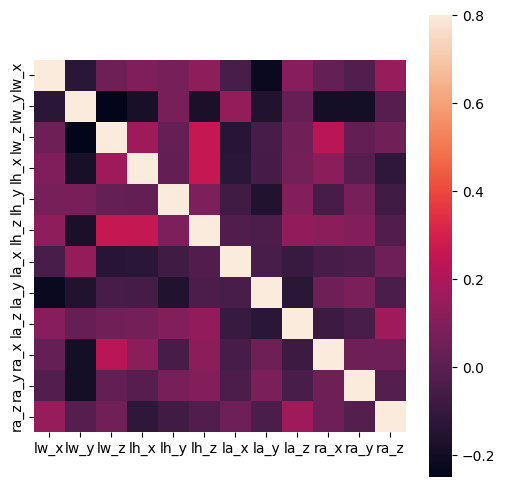

In [17]:
# heat map
# checking if some features are highly correlated or not.
corrmat=train.iloc[:,3:].corr()
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression
X_train=train.drop('activity',axis=1)
Y_train=train['activity']
X_test=test.drop('activity',axis=1)
Y_test=test['activity']

lr_clf=LogisticRegression(C=0.01,solver='liblinear')
lr_clf.fit(X_train,Y_train)

from sklearn.metrics import classification_report,accuracy_score
y_hat=lr_clf.predict(X_test)
print('accuracy score(test data): \n',accuracy_score(Y_test,y_hat))
print('Classification report(test dataset): \n',classification_report(Y_test,y_hat))

accuracy score(test data): 
 0.633366005597848


/Users/menglutao/.pyenv/versions/3.8.10/envs/prophet/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report(test dataset): 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00    156816
           2       0.00      0.00      0.00     26836
           3       0.00      0.00      0.00     28205
           4       0.74      0.97      0.84    374304
          77       0.00      0.00      0.00     12145
          99       0.51      0.68      0.58    319904

    accuracy                           0.63    918210
   macro avg       0.21      0.28      0.24    918210
weighted avg       0.48      0.63      0.55    918210



/Users/menglutao/.pyenv/versions/3.8.10/envs/prophet/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/menglutao/.pyenv/versions/3.8.10/envs/prophet/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



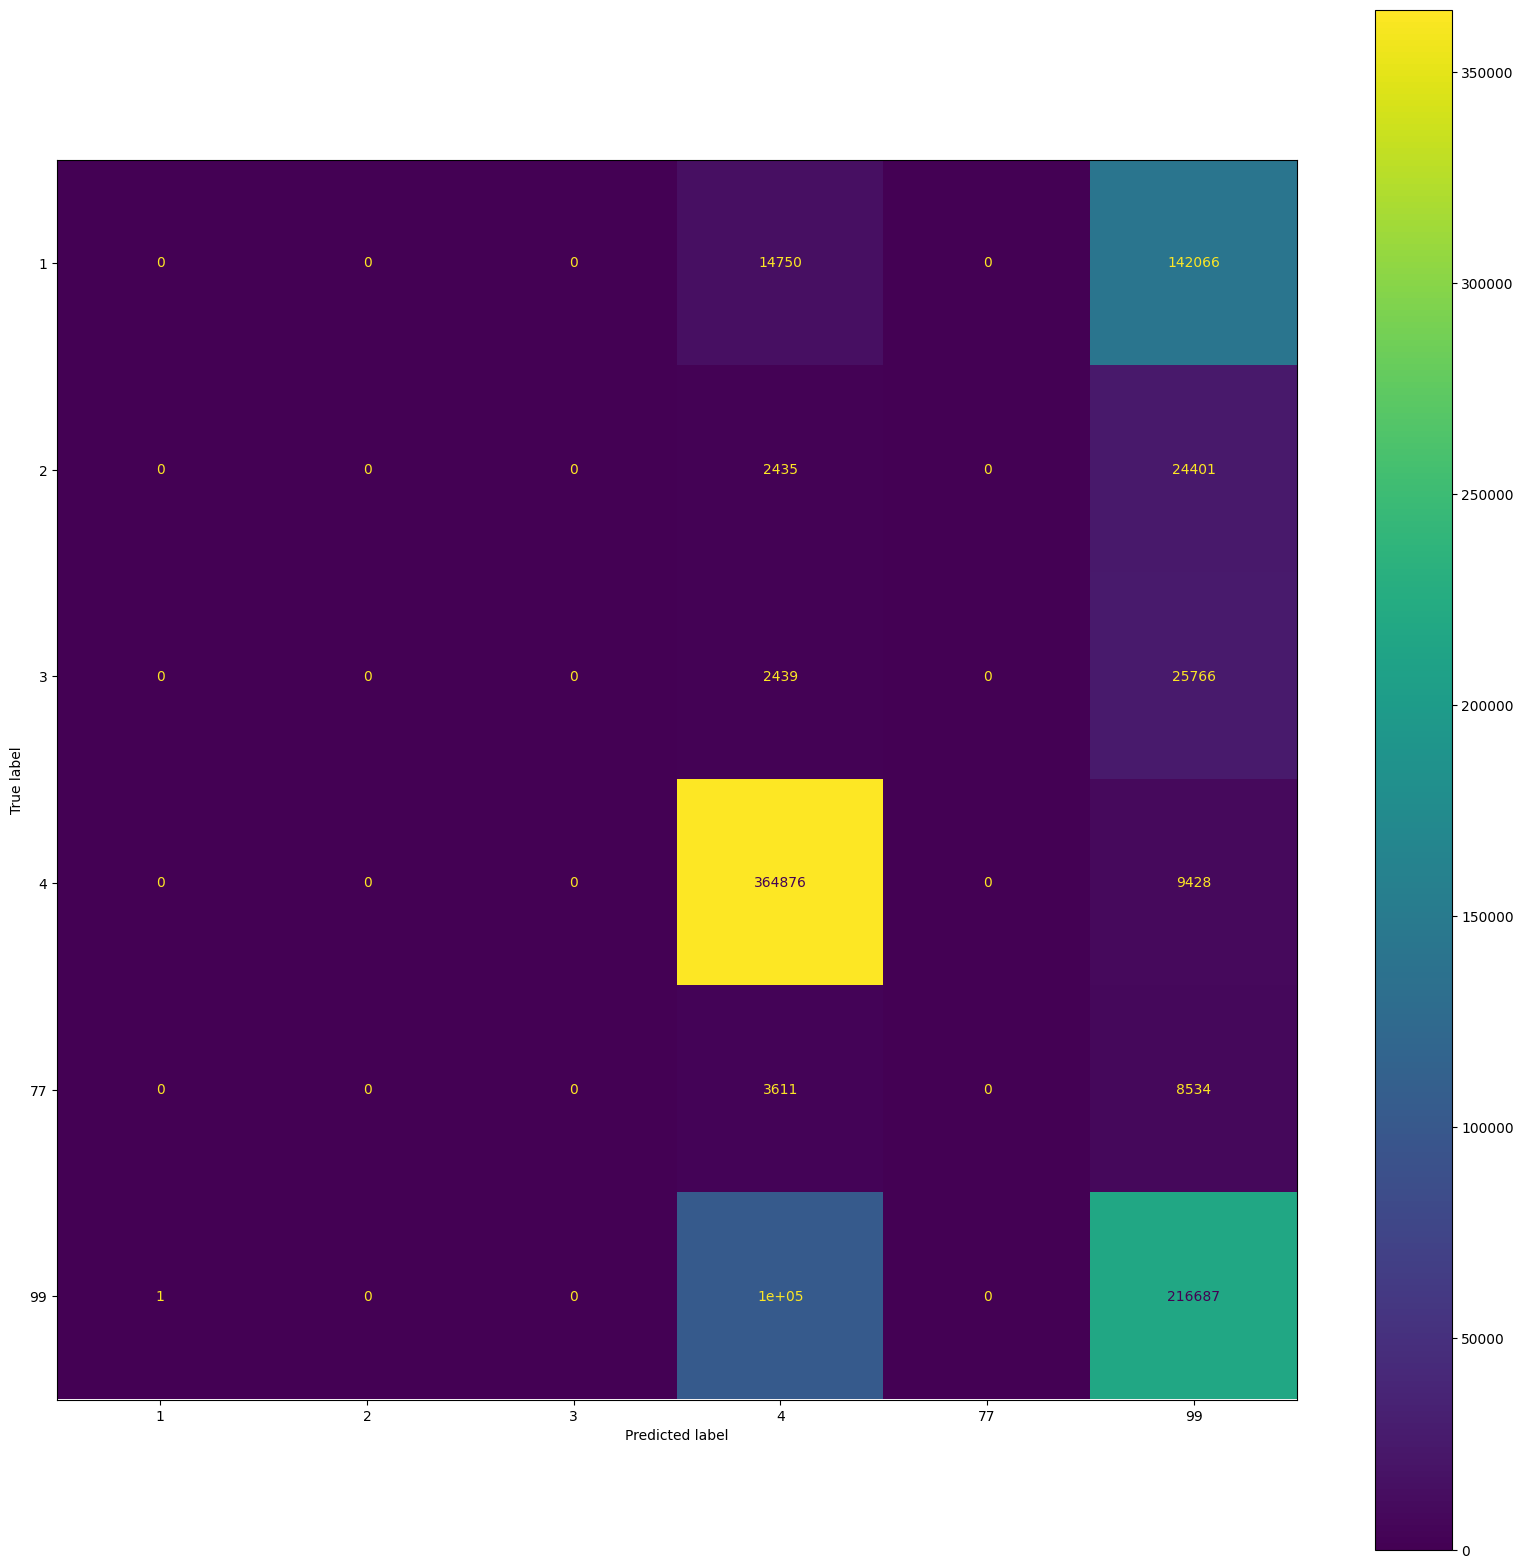

In [19]:
# confustion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_hat, labels=lr_clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_clf.classes_)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)